In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from quantiphy import Quantity
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [3]:
# All the observations between Jan_2020_to_March_2021
#observations = pd.read_csv('observations_Jan_2020_to_March_2021.csv')

# All the non science observations
non_science_observations = pd.read_csv('Non_science_observations_Jan_2020_to_March_2021.csv')

# All the science continuum observations
science_continuum_observations = pd.read_csv('science_continuum_observations_Jan_2020_to_March_2021.csv')

In [4]:
# All the observations between Jan_2020_to_March_2021
observations = pd.read_csv('all_obs.csv')

In [5]:
print('All observations : ',observations.CaptureBlockId.count())
print('Non science observations: ',non_science_observations.CaptureBlockId.count())
print('Science Continuum observations : ',science_continuum_observations.CaptureBlockId.count())

All observations :  2698
Non science observations:  6848
Science Continuum observations :  1392


In [6]:
# confirm all science continuum obseravtions is in all observations
#sum(science_continuum_observations['CaptureBlockId'].isin(observatiions['CaptureBlockId']).astype(int))

In [7]:
observations.columns # read columns

Index(['KatpointTargets', 'ProposalId', 'StartTime', 'CaptureBlockId',
       'Description', 'Duration', 'CAS.ProductTransferStatus', 'Public',
       'NumFreqChannels', 'Targets', 'MinFreq', 'MaxFreq'],
      dtype='object')

In [8]:
science_continuum_observations.columns # read columns

Index(['ProposalId', 'CaptureBlockId', 'Description', 'Duration',
       'CAS.ProductTransferStatus', 'Public', 'NumFreqChannels', 'Targets',
       'MinFreq', 'MaxFreq', 'RMSNoise'],
      dtype='object')

In [9]:
observations.head(3) # How the observation data looks like

,KatpointTargets,ProposalId,StartTime,CaptureBlockId,Description,Duration,CAS.ProductTransferStatus,Public,NumFreqChannels,Targets,MinFreq,MaxFreq
0,"J0408-6545 | 0408-658\, radec fluxcal bpcal de...",SCI-20180516-EB-01,2021-03-31T18:02:53Z,1617213676,MHONGOOSE J1337-28 rising 1,20163.39,SPOOLED,NaN,32768,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",1.336500e+09,1.443500e+09
1,"J0408-6545 | 0408-658\, radec fluxcal bpcal de...",SCI-20180516-EB-01,2021-03-31T18:02:45Z,1617213673,MHONGOOSE J1337-28 rising 1,20167.47,SPOOLED,NaN,4096,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",8.560000e+08,1.712000e+09
2,"J1939-6342 | 1934-638\, radec fluxcal bpcal de...",SCI-20210212-MP-01,2021-03-31T01:35:19Z,1617154503,Probing star-planet interaction in the Proxima...,1767.25,SPOOLED,NaN,4096,"J1939-6342,1934-638,J1424-4913,1421-490,Proxim...",8.560000e+08,1.712000e+09


total :  2698


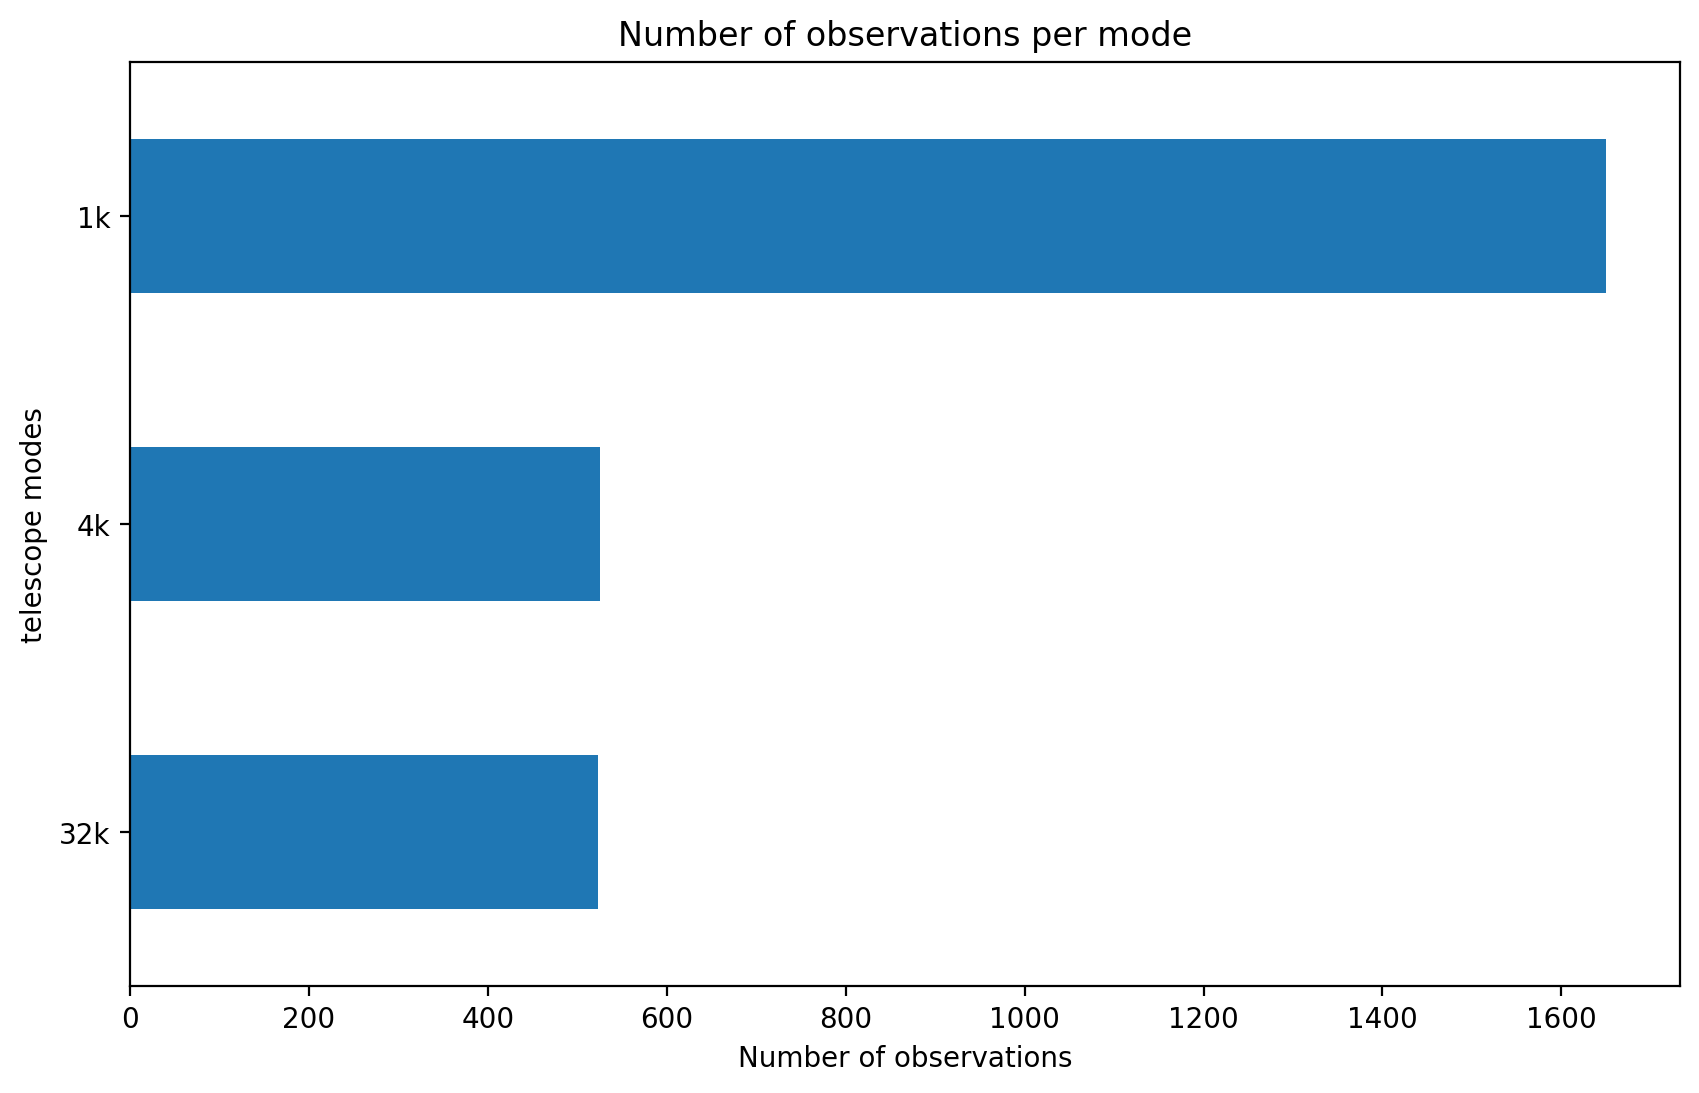

In [10]:
# Different telescope modes
# 32k = 32768 ; 4k = 4096; 1k = 1024

mode_32k_count = observations[observations['NumFreqChannels'] == 32768]['NumFreqChannels'].count() 
mode_4k_count = observations[observations['NumFreqChannels'] == 4096]['NumFreqChannels'].count()  
mode_1k_count = observations[observations['NumFreqChannels'] == 1024]['NumFreqChannels'].count()  

mode_counts = pd.DataFrame(
    {"No_of_observations": [mode_32k_count, mode_4k_count, mode_1k_count]}, 
    index=["32k", "4k", "1k"])

mode_counts['No_of_observations'].plot(kind="barh")
plt.title("Number of observations per mode")
plt.ylabel("telescope modes")
plt.xlabel("Number of observations")

# all add up
print('total : ',mode_1k_count + mode_32k_count + mode_4k_count)

Text(0, 0.5, 'Number of observations')

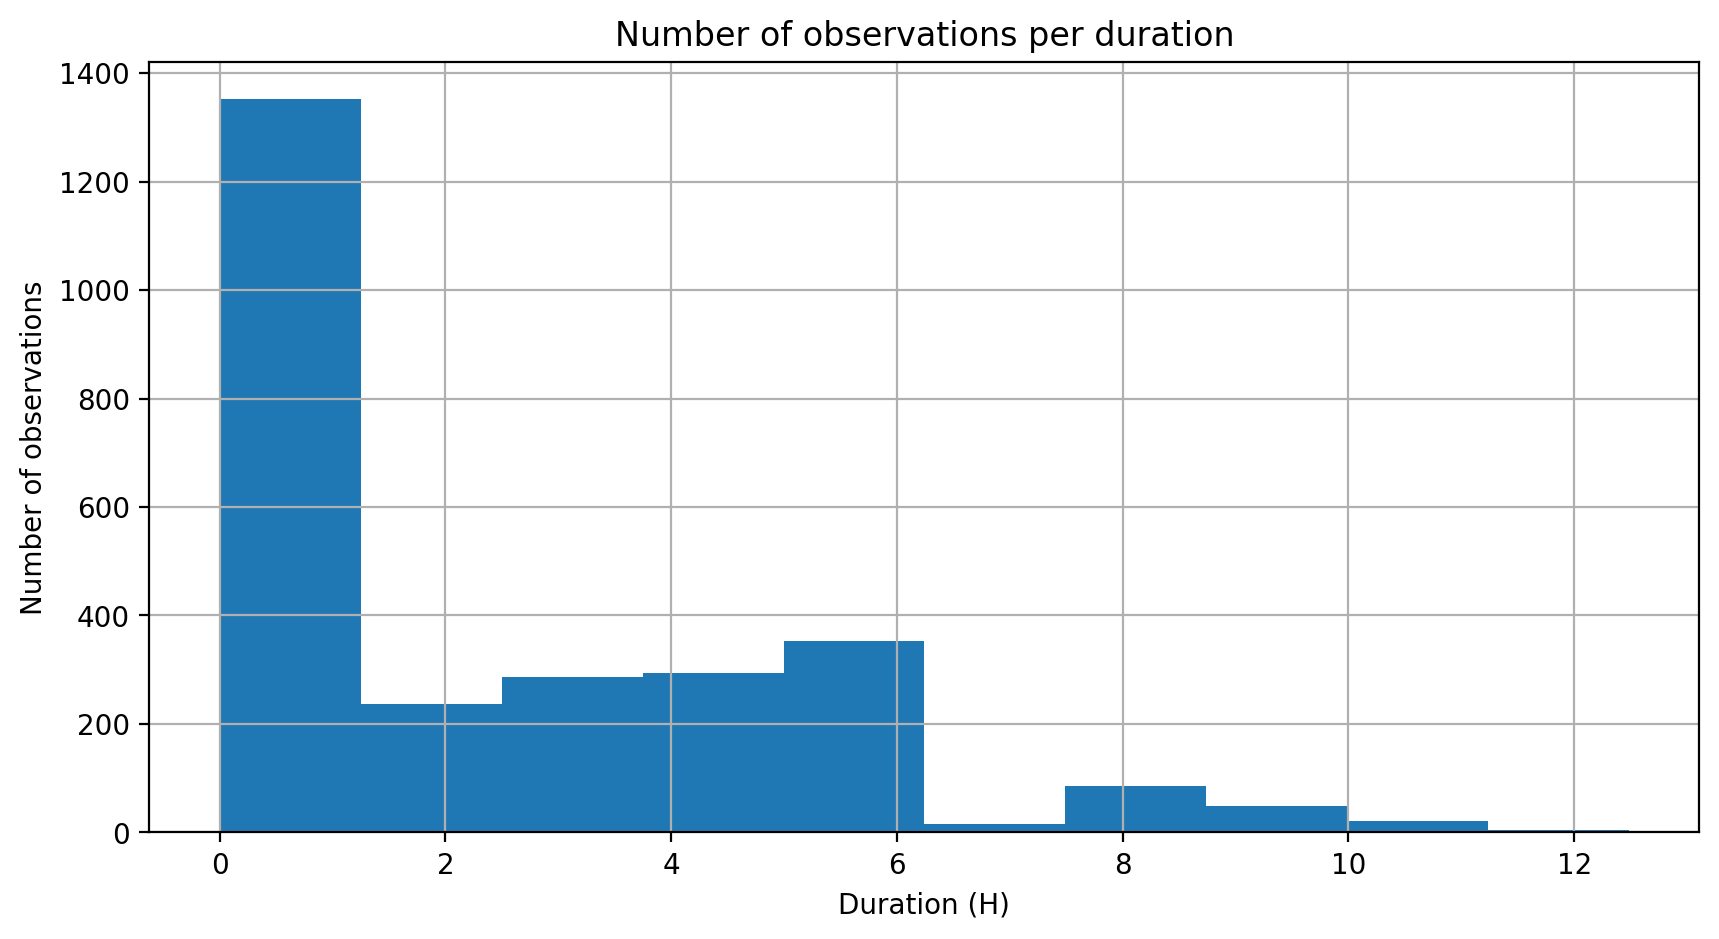

In [11]:
# different observation times
Duration = observations["Duration"]/3600
plt.figure();

Duration.hist(figsize=(10, 5));

plt.title("Number of observations per duration")
plt.xlabel("Duration (H)")
plt.ylabel("Number of observations")

In [12]:
observations.head(3)

,KatpointTargets,ProposalId,StartTime,CaptureBlockId,Description,Duration,CAS.ProductTransferStatus,Public,NumFreqChannels,Targets,MinFreq,MaxFreq
0,"J0408-6545 | 0408-658\, radec fluxcal bpcal de...",SCI-20180516-EB-01,2021-03-31T18:02:53Z,1617213676,MHONGOOSE J1337-28 rising 1,20163.39,SPOOLED,NaN,32768,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",1.336500e+09,1.443500e+09
1,"J0408-6545 | 0408-658\, radec fluxcal bpcal de...",SCI-20180516-EB-01,2021-03-31T18:02:45Z,1617213673,MHONGOOSE J1337-28 rising 1,20167.47,SPOOLED,NaN,4096,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",8.560000e+08,1.712000e+09
2,"J1939-6342 | 1934-638\, radec fluxcal bpcal de...",SCI-20210212-MP-01,2021-03-31T01:35:19Z,1617154503,Probing star-planet interaction in the Proxima...,1767.25,SPOOLED,NaN,4096,"J1939-6342,1934-638,J1424-4913,1421-490,Proxim...",8.560000e+08,1.712000e+09


In [13]:
# Some data wranlging
obs_w_targets_ra_dec = {}
obs_w_targets_calibrators = {}
r = re.compile('.*:.*:.*.')
for ob_i in range(len(observations)): 
    info = observations['KatpointTargets'][ob_i]
    targets = {}
    calibrators = []
    data = info.replace('\\', "").split(',')

    for i in range(int(len(data)/4)):
        
        # check for targets (concatenated w calibrator w |)
        if '|' in data[:4][0] and len(data[:4]) == 4:
            target = data[:4][0].split('|')[0] # first entry is target and calibrator
            calibrator = data[:4][0].split('|')[1]
        elif len(data[:4]) == 4:
            target = data[:4][0] # first entry is target w/o calibrator
        
        elif len(data[:4]) != 4: # check entries are in multiple of 4s
            print(ddata[:4])
            break
        ra = data[:4][-2]
        dec = data[:4][-1]
        
        if r.match(ra) is not None:
            targets[target] = [ra, dec]
        else: 
            break
        calibrators.append(calibrator)
        del data[:4]
        
    obs_w_targets_calibrators[int(observations['CaptureBlockId'][ob_i])] = set(calibrators)
    obs_w_targets_ra_dec[int(observations['CaptureBlockId'][ob_i])] = targets

In [14]:
# Number of projects observed

# Roll-back to PIDs not ProjectGrroup

Project_counts = observations.groupby(['ProposalId']).size()
print(Project_counts)

ProposalId
DDT-20191219-RD-01    3
DDT-20200120-MB-01    2
DDT-20200323-MN-01    5
DDT-20200506-BS-01    9
DDT-20200519-RN-01    3
                     ..
SSV-20201013-SA-01    1
SSV-20201215-SS-01    1
SSV-20210126-SA-01    2
SSV-20210128-SA-01    5
SSV-20210318-SS-01    1
Length: 98, dtype: int64


In [15]:
# frequency names
# UHF band 300 MHz to 1 GHz
# L 1 to 2 GHz
# S 2 to 4 GHz
# C 4 to 8 GHz
# X 8 to 12 GHz 
# Ku 12 to 18 GHz

#UHF --> [544Mhz - 1088Mhz]

band_names = {}

for obs_id in range(len(observations)):
    # minimum freq
    Min = observations['MinFreq'][obs_id]
    Max = observations['MaxFreq'][obs_id]
    
    fo = (Max+Min)/2 
    # print('fo')
    # print("{:e}".format(fo))
    if fo <= 856e+06 and Min >= 544e+06 and Max <= 1088e+06:
        band_name = 'UHF'
        # print("{:e}".format(Max))
        # print("{:e}".format(Min))
        
    elif fo > 856e+06 and Min >= 856e+06 and Max <= 1712e+06:
        band_name = 'L-Band'
        # print("{:e}".format(Max))
        # print("{:e}".format(Min))
        
    elif fo > 856e+06 and Min >= 1336e+06 and Max <= 1443e+06:
        band_name = 'Narrow L-Band'
        
    # else:
    #     print('which band')
    #     print("{:e}".format(Max))
    #     print("{:e}".format(Min))
    #     print('----')

    band_names[observations['CaptureBlockId'][obs_id]] = band_name

In [16]:
len(band_names)

2698

In [17]:
# Add column for ra/dec
observations['Targets_ra/dec'] = observations['CaptureBlockId'].map(obs_w_targets_ra_dec)
observations['calibrators'] = observations['CaptureBlockId'].map(obs_w_targets_calibrators)
observations['FreqBand'] = observations['CaptureBlockId'].map(band_names)

observations.drop('KatpointTargets', inplace=True, axis=1)

In [18]:
observations.head(3)

,ProposalId,StartTime,CaptureBlockId,Description,Duration,CAS.ProductTransferStatus,Public,NumFreqChannels,Targets,MinFreq,MaxFreq,Targets_ra/dec,calibrators,FreqBand
0,SCI-20180516-EB-01,2021-03-31T18:02:53Z,1617213676,MHONGOOSE J1337-28 rising 1,20163.39,SPOOLED,NaN,32768,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",1.336500e+09,1.443500e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1'...","{ 0408-658, 1127-145, 3C283}",L-Band
1,SCI-20180516-EB-01,2021-03-31T18:02:45Z,1617213673,MHONGOOSE J1337-28 rising 1,20167.47,SPOOLED,NaN,4096,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",8.560000e+08,1.712000e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1'...","{ 0408-658, 1127-145, 3C283}",L-Band
2,SCI-20210212-MP-01,2021-03-31T01:35:19Z,1617154503,Probing star-planet interaction in the Proxima...,1767.25,SPOOLED,NaN,4096,"J1939-6342,1934-638,J1424-4913,1421-490,Proxim...",8.560000e+08,1.712000e+09,"{'J1939-6342 ': [' 19:39:25.03', ' -63:42:45.6...","{ 1421-490, 1934-638}",L-Band


In [19]:
#observation_types_index

In [32]:
writer = pd.ExcelWriter('observations_1_Jan_2020_31_March_2021_updated.xlsx',engine='xlsxwriter')
observations.to_excel(writer,sheet_name='observations')
writer.save()

- UHF-band and L-Band
- fo > 856MHz --> L-Band
- UHF --> [544Mhz - 1088Mhz]
- L-Band --> [856Mhz - 1712Mhz]
- Narrow L-Band --> [1336Mhz - 1443Mhz]

In [20]:
continuum_info = pd.read_csv('continuum.csv')

In [21]:
continuum_info.head(2)

,salId,CaptureBlockId,Description,Duration,CAS.ProductTransferStatus,Public,NumFreqChannels,Targets,MinFreq,MaxFreq,RMSNoise
0,SCI-20180516-EB-01,1617213673,MHONGOOSE J1337-28 rising 1: Continuum image,NaN,ERROR,NaN,NaN,J1337-28,NaN,NaN,0.000004
1,SCI-20210212-MP-01,1617154503,Probing star-planet interaction in the Proxima...,NaN,ARCHIVED,NaN,NaN,Proxima-Cen,NaN,NaN,0.000025


In [22]:
continuum_indices = []
for i in science_continuum_observations['CaptureBlockId']:
    continuum_index = np.where(observations['CaptureBlockId'] == i)
    continuum_indices.append(continuum_index)

In [23]:
spectral_info = pd.read_json('science_spectral_observations_Jan_2020_to_March_2021.json',orient='records')

In [24]:
spectral_cbids = []
for i in spectral_info['grouped']['CaptureBlockId']['groups']:
    spectral_cbids.append(int(i['groupValue']))

In [25]:
spectral_indices = []
for i in spectral_cbids:
    spectral_index = np.where(observations['CaptureBlockId'] == i)
    spectral_indices.append(spectral_index)

In [26]:
len(continuum_indices), len(spectral_indices)

(1392, 390)

In [27]:
observations['hasimage (spec/cont)'] = 0

In [32]:
for i in spectral_indices:
    observations.loc[i[0], "hasimage (spec/cont)"] = 1
    
for ids in continuum_indices:
    observations.loc[ids[0], "hasimage (spec/cont)"] = 1

In [33]:
observations

,ProposalId,StartTime,CaptureBlockId,Description,Duration,CAS.ProductTransferStatus,Public,NumFreqChannels,Targets,MinFreq,MaxFreq,Targets_ra/dec,calibrators,FreqBand,hasimage (spec/cont)
0,SCI-20180516-EB-01,2021-03-31T18:02:53Z,1617213676,MHONGOOSE J1337-28 rising 1,20163.39,SPOOLED,NaN,32768,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",1.336500e+09,1.443500e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1'...","{ 0408-658, 1127-145, 3C283}",L-Band,0
1,SCI-20180516-EB-01,2021-03-31T18:02:45Z,1617213673,MHONGOOSE J1337-28 rising 1,20167.47,SPOOLED,NaN,4096,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",8.560000e+08,1.712000e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1'...","{ 0408-658, 1127-145, 3C283}",L-Band,1
2,SCI-20210212-MP-01,2021-03-31T01:35:19Z,1617154503,Probing star-planet interaction in the Proxima...,1767.25,SPOOLED,NaN,4096,"J1939-6342,1934-638,J1424-4913,1421-490,Proxim...",8.560000e+08,1.712000e+09,"{'J1939-6342 ': [' 19:39:25.03', ' -63:42:45.6...","{ 1421-490, 1934-638}",L-Band,1
3,SCI-20180516-MB-03,2021-03-30T23:01:32Z,1617145281,MeerTime Relbin U-band 2021-03-30 J0955-6150 c...,7258.81,SPOOLED,NaN,1024,J0955-6150,5.440000e+08,1.088000e+09,"{'J0955-6150': [' 9:55:20.85', ' -61:50:16.9']}",{ 1421-490},UHF,0
4,SCI-20180516-MB-93,2021-03-30T22:50:32Z,1617144627,Meertime phase up with flatten bandpass,448.17,SPOOLED,NaN,1024,"J1939-6342,PKS1934-638,PKS 1934-63",5.440000e+08,1.088000e+09,"{'J1939-6342 ': [' 19:39:25.03', ' -63:42:45.6']}",{ PKS1934-638 },UHF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,SCI-20180516-MB-02,2020-01-01T05:11:20Z,1577855471,MeerTIME TPA December block 2 (part 1c),5245.78,SPOOLED,NaN,1024,"J1141-3322,J0942-5657,J1042-5521,J1709-4429,J1...",8.560000e+08,1.712000e+09,"{'J1141-3322': [' 11:41:42.76', ' -33:22:37.4'...",{ PKS1934-638 },L-Band,0
2694,SCI-20180516-MB-03,2020-01-01T03:58:26Z,1577851054,MeerTIME J0955-6150,3638.46,SPOOLED,NaN,1024,J0955-6150,8.560000e+08,1.712000e+09,"{'J0955-6150': [' 9:55:20.85', ' -61:50:16.9']}",{ PKS1934-638 },L-Band,0
2695,SCI-20180516-MB-99,2020-01-01T03:48:21Z,1577850498,Meertime phase up with flatten bandpass,399.83,SPOOLED,NaN,1024,"J0825-5010,PKS 0823-500",8.560000e+08,1.712000e+09,"{'J0825-5010 ': [' 8:25:26.87', ' -50:10:38.5']}",{ PKS 0823-500},L-Band,0
2696,SCI-20180516-MB-99,2020-01-01T03:04:08Z,1577847826,Meertime phase up with flatten bandpass,447.81,SPOOLED,NaN,4096,"J0408-6545,PKS 0408-65,PKS 0407-65",8.560000e+08,1.712000e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1']}",{ PKS 0408-65 },L-Band,0


In [30]:
writer = pd.ExcelWriter('observations_1_Jan_2020_31_March_2021_updated_1.xlsx',engine='xlsxwriter')
observations.to_excel(writer,sheet_name='observations')
writer.save()

In [31]:
observations

,ProposalId,StartTime,CaptureBlockId,Description,Duration,CAS.ProductTransferStatus,Public,NumFreqChannels,Targets,MinFreq,MaxFreq,Targets_ra/dec,calibrators,FreqBand,hasimage (spec/cont)
0,SCI-20180516-EB-01,2021-03-31T18:02:53Z,1617213676,MHONGOOSE J1337-28 rising 1,20163.39,SPOOLED,NaN,32768,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",1.336500e+09,1.443500e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1'...","{ 0408-658, 1127-145, 3C283}",L-Band,0
1,SCI-20180516-EB-01,2021-03-31T18:02:45Z,1617213673,MHONGOOSE J1337-28 rising 1,20167.47,SPOOLED,NaN,4096,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",8.560000e+08,1.712000e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1'...","{ 0408-658, 1127-145, 3C283}",L-Band,1
2,SCI-20210212-MP-01,2021-03-31T01:35:19Z,1617154503,Probing star-planet interaction in the Proxima...,1767.25,SPOOLED,NaN,4096,"J1939-6342,1934-638,J1424-4913,1421-490,Proxim...",8.560000e+08,1.712000e+09,"{'J1939-6342 ': [' 19:39:25.03', ' -63:42:45.6...","{ 1421-490, 1934-638}",L-Band,1
3,SCI-20180516-MB-03,2021-03-30T23:01:32Z,1617145281,MeerTime Relbin U-band 2021-03-30 J0955-6150 c...,7258.81,SPOOLED,NaN,1024,J0955-6150,5.440000e+08,1.088000e+09,"{'J0955-6150': [' 9:55:20.85', ' -61:50:16.9']}",{ 1421-490},UHF,0
4,SCI-20180516-MB-93,2021-03-30T22:50:32Z,1617144627,Meertime phase up with flatten bandpass,448.17,SPOOLED,NaN,1024,"J1939-6342,PKS1934-638,PKS 1934-63",5.440000e+08,1.088000e+09,"{'J1939-6342 ': [' 19:39:25.03', ' -63:42:45.6']}",{ PKS1934-638 },UHF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,SCI-20180516-MB-02,2020-01-01T05:11:20Z,1577855471,MeerTIME TPA December block 2 (part 1c),5245.78,SPOOLED,NaN,1024,"J1141-3322,J0942-5657,J1042-5521,J1709-4429,J1...",8.560000e+08,1.712000e+09,"{'J1141-3322': [' 11:41:42.76', ' -33:22:37.4'...",{ PKS1934-638 },L-Band,0
2694,SCI-20180516-MB-03,2020-01-01T03:58:26Z,1577851054,MeerTIME J0955-6150,3638.46,SPOOLED,NaN,1024,J0955-6150,8.560000e+08,1.712000e+09,"{'J0955-6150': [' 9:55:20.85', ' -61:50:16.9']}",{ PKS1934-638 },L-Band,0
2695,SCI-20180516-MB-99,2020-01-01T03:48:21Z,1577850498,Meertime phase up with flatten bandpass,399.83,SPOOLED,NaN,1024,"J0825-5010,PKS 0823-500",8.560000e+08,1.712000e+09,"{'J0825-5010 ': [' 8:25:26.87', ' -50:10:38.5']}",{ PKS 0823-500},L-Band,0
2696,SCI-20180516-MB-99,2020-01-01T03:04:08Z,1577847826,Meertime phase up with flatten bandpass,447.81,SPOOLED,NaN,4096,"J0408-6545,PKS 0408-65,PKS 0407-65",8.560000e+08,1.712000e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1']}",{ PKS 0408-65 },L-Band,0
